## Problem 1

In [136]:
import sympy as sy
import numpy as np
from matplotlib import pyplot as plt

# define f(x)
f = (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))

# sybomlic derivative
x = sy.symbols('x')
f_d = sy.diff(f,x)

# lambdify the functions
f = sy.lambdify(x, f)
f_d = sy.lambdify(x, f_d)

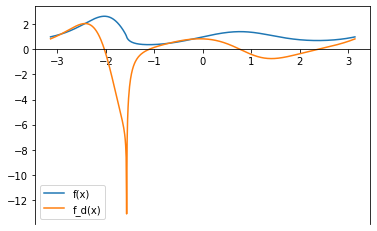

In [137]:
# plot f(x) and its derivative
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

x_domain = np.arange(-np.pi, np.pi, 0.01)
ax.plot(x_domain, f(x_domain), label = "f(x)")
ax.plot(x_domain, f_d(x_domain), label = "f_d(x)")
ax.legend()

## Problem 2

In [147]:
# write the required functions
def forward_1(fn, x, h=0.01):
    return (fn(x + h) - fn(x))/h

def forward_2(fn, x, h=0.01):
    return (-3 * fn(x) + 4 * f(x + h) - f(x + 2 * h))/(2 * h)

def backward_1(fn, x, h=0.01):
    return (fn(x) - f(x - h))/h

def backward_2(fn, x, h=0.01):
    return (3 * fn(x) - 4 * fn(x - h) + fn(x - 2 * h)) / (2 * h)

def centered_2(fn, x, h=0.01):
    return (fn(x + h) - fn(x - h)) / (2 * h)

# def centered_4(fn, x, h=0.01):
#    return (fn(x - 2 * h) - 8 * fn(x - h) + 8 * fn(x + h) - fn(x + 2 * h))/ (12 * h)


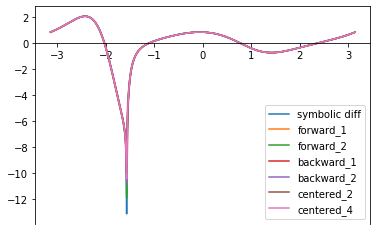

In [152]:
# plot the functions and compare with Problem 1

ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot(x_domain, f_d(x_domain), label = "symbolic diff")
ax.plot(x_domain, forward_1(f, x_domain), label = "forward_1")
ax.plot(x_domain, forward_2(f, x_domain), label = "forward_2")
ax.plot(x_domain, backward_1(f, x_domain), label = "backward_1")
ax.plot(x_domain, backward_2(f, x_domain), label = "backward_2")
ax.plot(x_domain, centered_2(f, x_domain), label = "centered_2")
ax.plot(x_domain, centered_4(f, x_domain), label = "centered_4")
ax.legend()


## Problem 3

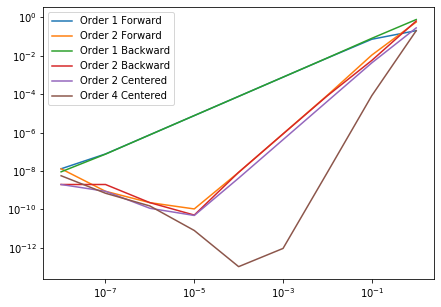

In [171]:
# plot 
def plt_abs_error(x):
    h_vals = np.logspace(-8, 0, 9)
    ax = plt.figure(figsize=(7,5)).gca()
    ax.loglog(h_vals, abs(forward_1(f, x, h_vals) - f_d(x)), label = "Order 1 Forward")
    ax.loglog(h_vals, abs(forward_2(f, x, h_vals) - f_d(x)), label = "Order 2 Forward")
    ax.loglog(h_vals, abs(backward_1(f, x, h_vals) - f_d(x)), label = "Order 1 Backward")
    ax.loglog(h_vals, abs(backward_2(f, x, h_vals) - f_d(x)), label = "Order 2 Backward")
    ax.loglog(h_vals, abs(centered_2(f, x, h_vals) - f_d(x)), label = "Order 2 Centered")
    ax.loglog(h_vals, abs(centered_4(f, x, h_vals) - f_d(x)), label = "Order 4 Centered")
    ax.legend()

plt_abs_error(1)
    
    

## Problem 4